In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv(r"C:\Users\Administrator\Downloads\Heart Failure Data.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [5]:
scale = MinMaxScaler()
data['creatinine_phosphokinase'] = scale.fit_transform(data[['creatinine_phosphokinase']])
data['platelets'] = scale.fit_transform(data[['platelets']])
print(data['creatinine_phosphokinase'].head())
data['platelets'].tail()

0    0.071319
1    1.000000
2    0.015693
3    0.011227
4    0.017479
Name: creatinine_phosphokinase, dtype: float64


294    0.157474
295    0.296884
296    0.869075
297    0.139290
298    0.448418
Name: platelets, dtype: float64

In [6]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
data.duplicated().sum()

0

### Visualization

<AxesSubplot:>

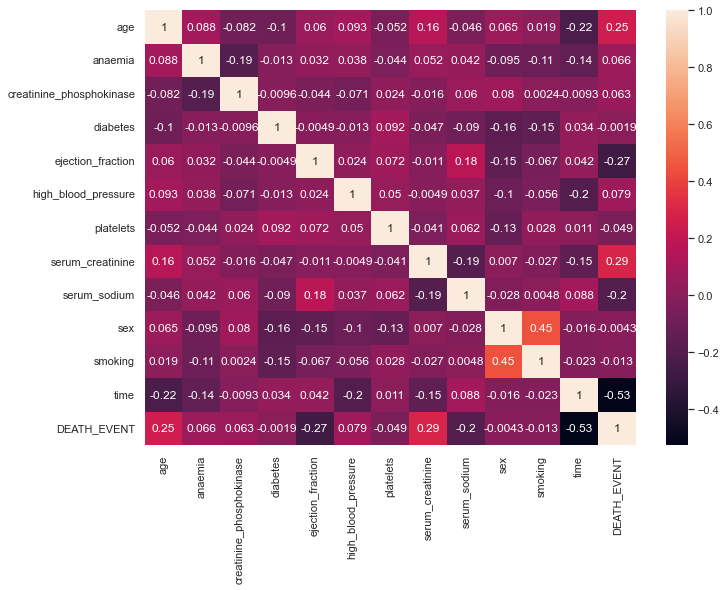

In [8]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(data.corr(),annot=True)

age
0.4209365580238486


<Figure size 360x216 with 0 Axes>

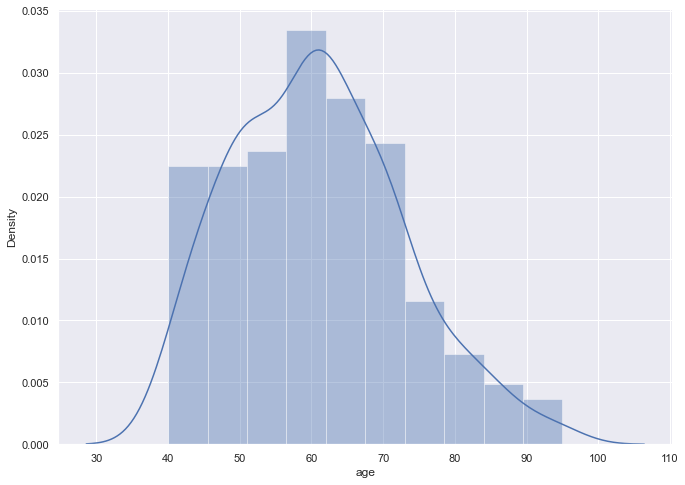

anaemia
0.27686275801578286


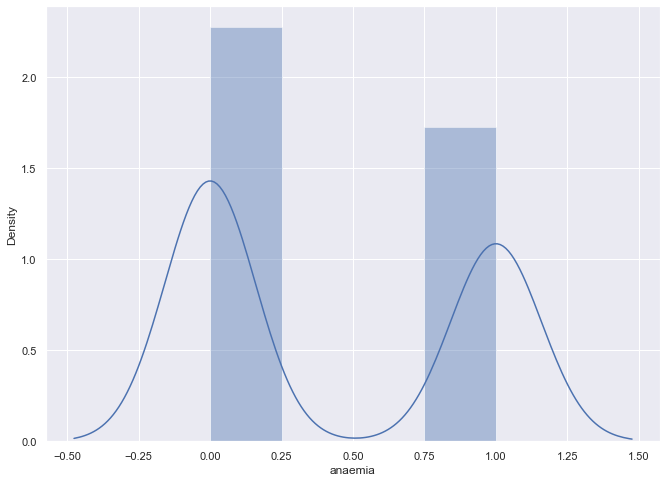

creatinine_phosphokinase
4.440688625555511


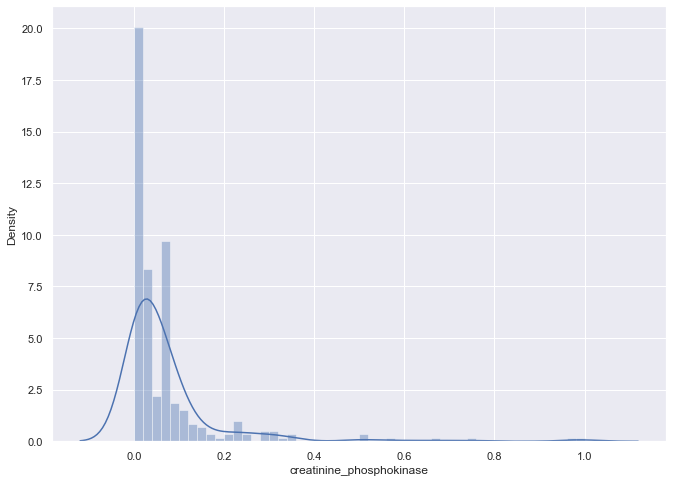

diabetes
0.33225111677419733


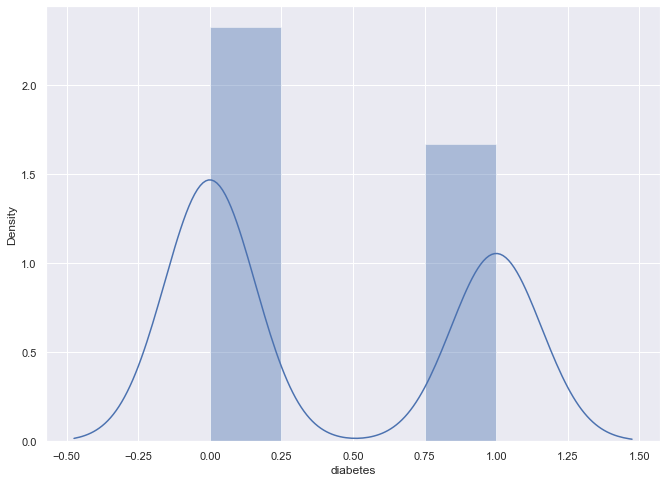

ejection_fraction
0.5525926588215331


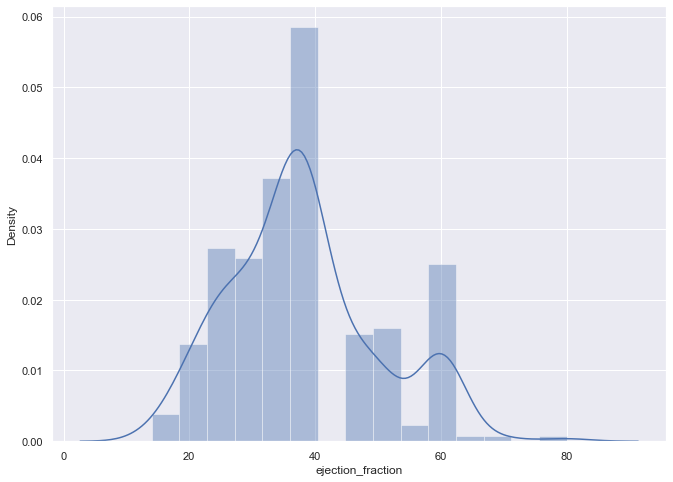

high_blood_pressure
0.6235833232384503


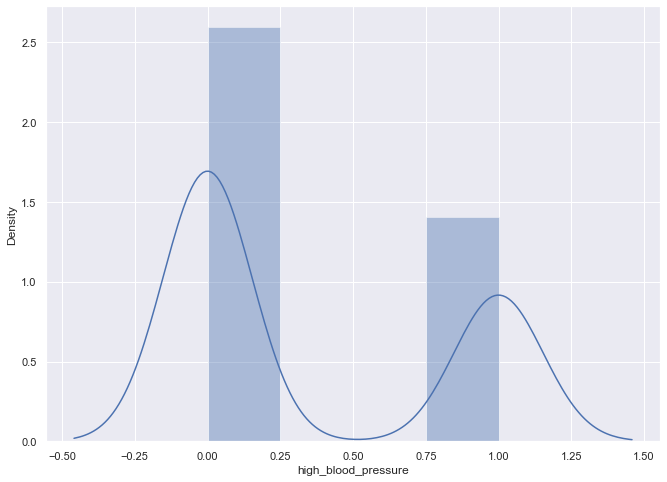

platelets
1.4549745335147461


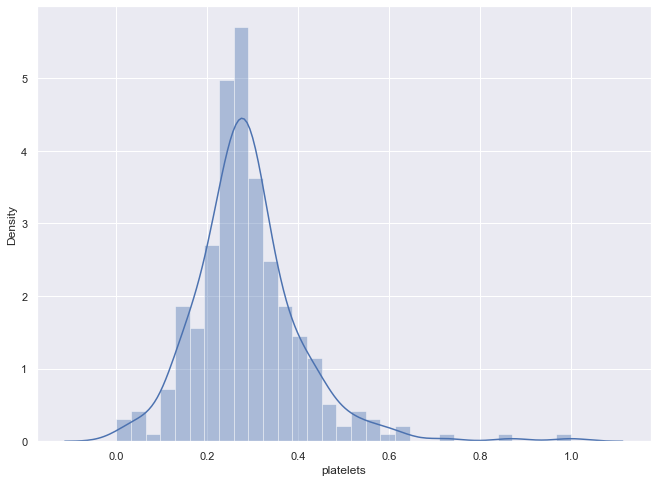

serum_creatinine
4.433610162782361


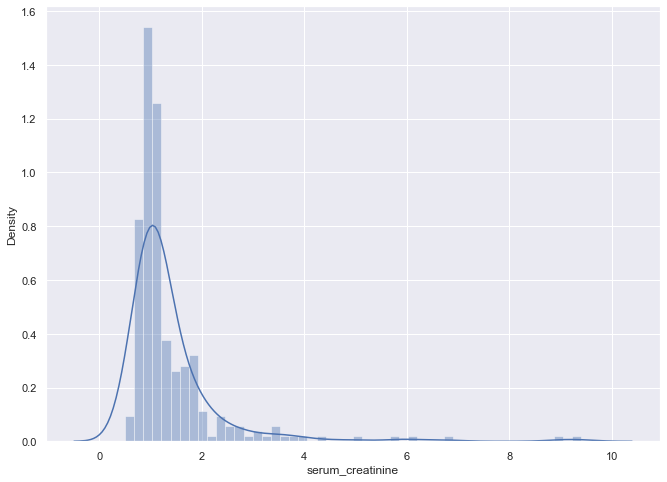

serum_sodium
-1.04287046392733


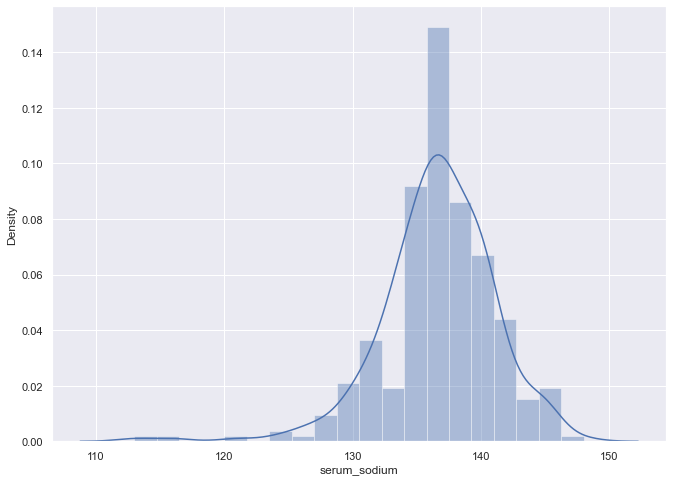

sex
-0.6235833232384503


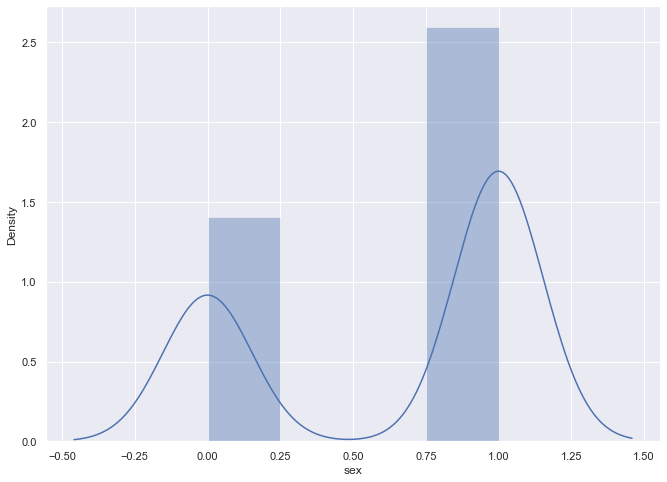

smoking
0.7664787911444256


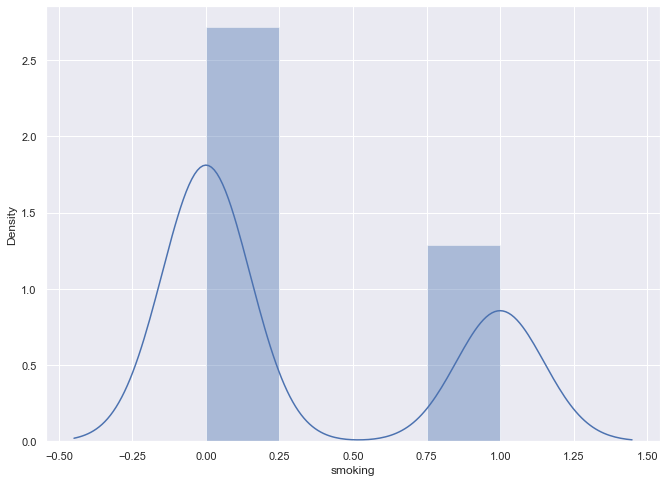

time
0.12716059964019436


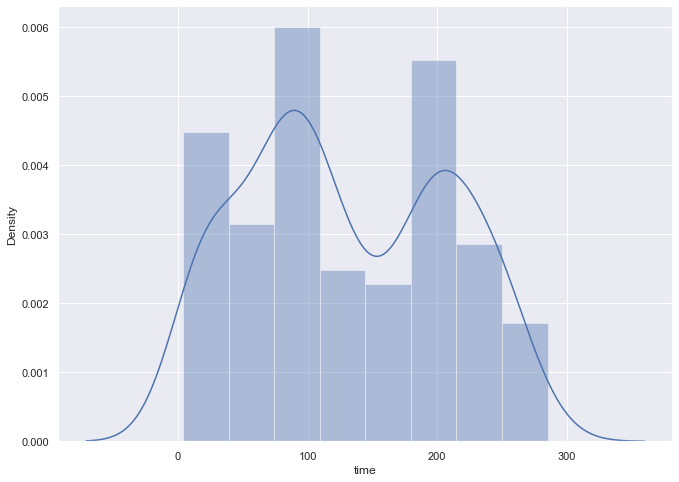

DEATH_EVENT
0.7664787911444257


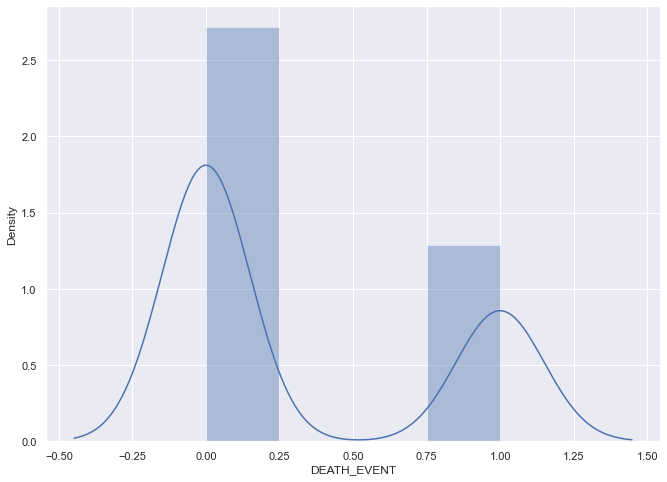

In [9]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,3))
for col in data:
    print(col)
    print(skew(data[col]))
    plt.figure()
    sns.distplot(data[col])
    plt.show()

<AxesSubplot:>

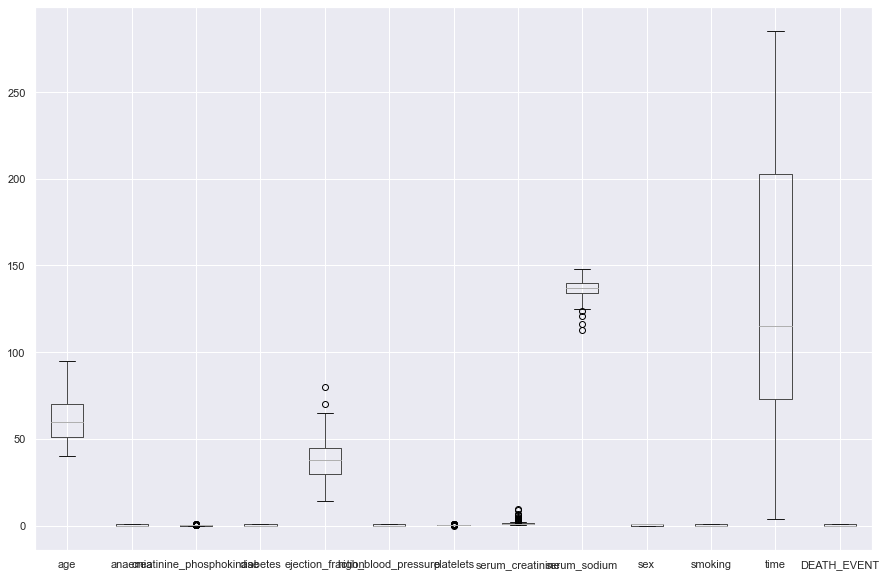

In [10]:
plt.figure(figsize = (15,10))
data.boxplot()

<AxesSubplot:xlabel='diabetes', ylabel='sex'>

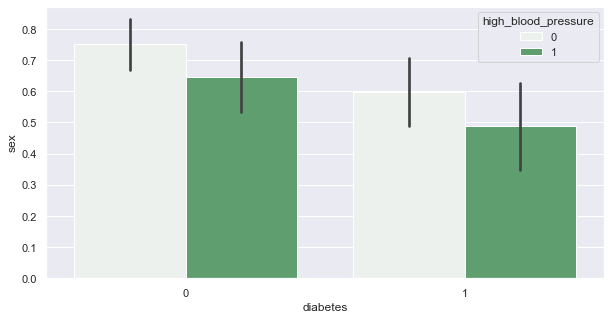

In [11]:
plt.figure(figsize = (10,5))
sns.barplot(data.diabetes, data.sex,hue = data.high_blood_pressure,color ="g")

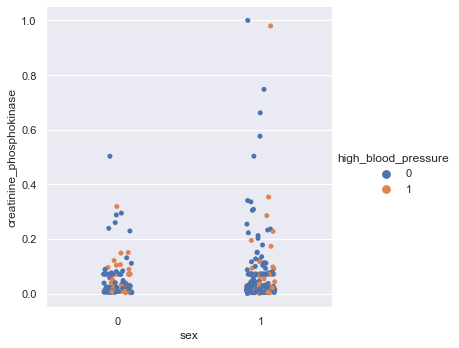

In [12]:
plot = sns.catplot(x = "sex",y = "creatinine_phosphokinase",kind = "strip",data = data,
                      hue = "high_blood_pressure")

### Splitting the data

In [13]:
data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [14]:
df = data.copy()
y = df.DEATH_EVENT
x = df.drop(columns = "DEATH_EVENT")
print(x.shape,y.shape)

(299, 12) (299,)


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(239, 12) (239,)
(60, 12) (60,)


### Modelling

In [16]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [32]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Algorithm", "Accuracy", "Precision","Recall"])

def modelling(X_train,Y_train,X_test,Y_test,model):
    obj = model()
    obj.fit(X_train, Y_train)
    #train_pred = obj.predict(X_train)
    test_pred = obj.predict(X_test)
    
    # get the model name
    x = str(model)
    x1 = x.split('.')[-1]
    x2 = x1.split("'")[0]
    
    # Classification report
#     train_acc = accuracy_score(X_train, train_pred)
    test_acc = str(round(accuracy_score(Y_test, test_pred)*100,2))+ '%'
    prec = str(round(precision_score(Y_test, test_pred)*100, 2)) + '%'
    rec = str(round(recall_score(Y_test, test_pred)*100, 2)) + '%'
    cm = confusion_matrix(Y_test, test_pred)
    
    myTable.add_row([x2, test_acc, prec, rec]) 

In [33]:
modelling(X_train,Y_train,X_test,Y_test, LogisticRegression)
modelling(X_train,Y_train,X_test,Y_test, RandomForestClassifier)
modelling(X_train,Y_train,X_test,Y_test, KNeighborsClassifier)
print(myTable)

+------------------------+----------+-----------+--------+
|       Algorithm        | Accuracy | Precision | Recall |
+------------------------+----------+-----------+--------+
|   LogisticRegression   |  90.0%   |   78.57%  | 78.57% |
| RandomForestClassifier |  91.67%  |   84.62%  | 78.57% |
|  KNeighborsClassifier  |  88.33%  |   76.92%  | 71.43% |
+------------------------+----------+-----------+--------+


##### Random Forest gives better accuracy than other models